In [3]:
import numpy as np                 
import pandas as pd                
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [8]:
import os


def combine_state_df(dataset_src, state_name):

    # Read stations_info.csv and drop unnecessary columns
    df_states = pd.read_csv(f'{dataset_src}/stations_info.csv')
    df_states.drop(columns=['agency', 'station_location', 'start_month'], inplace=True)
    # Filter df_states based on state_name and sort by city and start_year
    filtered_states = df_states[df_states["state"] == state_name].sort_values(by=["city", "start_year"])

    # Get state code and state files for the given state_name
    state_code = filtered_states['file_name'].iloc[0][:2]
    state_files = glob.glob(f'{dataset_src}/{state_code}*.csv')

    print(f'Combining a total of {len(state_files)} files...\n')

    combined_df = []
    print(combined_df)
    
    for state_file in state_files:
        print(state_file)
        file_name = state_file.split('\\')[1][0:-4]
        print(file_name)
        file_df = pd.read_csv(state_file)
        file_df['city'] = filtered_states[filtered_states['file_name'] == file_name]['city'].values[0]
        file_df['city'] = file_df['city'].astype('string')
        combined_df.append(file_df)

    return pd.concat(combined_df)

# Example usage
dataset_src = '../data/raw/air_data/'
df = combine_state_df(dataset_src, 'Tamil Nadu')
print(os.getcwd())
df.to_csv(os.path.join("..","data","processed","data.csv"))


Combining a total of 26 files...

[]
../data/raw/air_data\TN001.csv
TN001
../data/raw/air_data\TN002.csv
TN002
../data/raw/air_data\TN003.csv
TN003
../data/raw/air_data\TN004.csv
TN004
../data/raw/air_data\TN005.csv
TN005
../data/raw/air_data\TN006.csv
TN006
../data/raw/air_data\TN007.csv
TN007
../data/raw/air_data\TN008.csv
TN008
../data/raw/air_data\TN009.csv
TN009
../data/raw/air_data\TN010.csv
TN010
../data/raw/air_data\TN011.csv
TN011
../data/raw/air_data\TN012.csv
TN012
../data/raw/air_data\TN013.csv
TN013
../data/raw/air_data\TN014.csv
TN014
../data/raw/air_data\TN015.csv
TN015
../data/raw/air_data\TN016.csv
TN016
../data/raw/air_data\TN017.csv
TN017
../data/raw/air_data\TN018.csv
TN018
../data/raw/air_data\TN019.csv
TN019
../data/raw/air_data\TN020.csv
TN020
../data/raw/air_data\TN021.csv
TN021
../data/raw/air_data\TN022.csv
TN022
../data/raw/air_data\TN023.csv
TN023
../data/raw/air_data\TN024.csv
TN024
../data/raw/air_data\TN025.csv
TN025
../data/raw/air_data\TN026.csv
TN026
p

OSError: Cannot save file into a non-existent directory: ',,\data\processed'

In [4]:
def columns_name(df):
    column_names = []
    for name in list(df.columns):
        column_names.append(name.split()[0])
    return sorted(column_names)

def create_dt_index(dataframe):
    dataframe = dataframe.drop(columns='To Date')
    dataframe['From Date'] = pd.to_datetime(dataframe['From Date'])
    dataframe = dataframe.rename(columns={'From Date': 'datetime'})
    return dataframe.set_index('datetime')

def value_dropper(df):
    # dropping values that have more than 80% null values
    null_values = null_value_percentage(df)
    droppable_values = [key for key, value in null_values.items() if value > 0.80 ]
    new_df = df.drop(droppable_values,axis=1)
    return new_df

def null_columns_per_city(df):
    Null_Value_Dictionary = {}
    for i in range(len(cities)):
        Null_Value_Dictionary[cities[i]] = df.columns[df[df["city"] == cities[i]].isnull().all()].tolist()
    return [key + f"   {len(value)}  {value}" for key, value in Null_Value_Dictionary.items()]

def null_value_percentage(df):
    null_percentage = {}
    for i in list(df.columns):
        null_percentage[i] = round(len(df[df[i].isnull()])/len(df),3)
    return null_percentage    


def column_merger(df1,column_name1,column_name2,convertion = 1):
    df1[column_name2] = df1[column_name2] * convertion
    df1[column_name1].fillna(df1[column_name2],inplace = True)
    df1.drop([column_name2], axis=1, inplace=True)

    
df = create_dt_index(df)


column_merger(df,"NOx (ppb)","NOx (ppm)",1000)
column_merger(df,'BP (mmHg)','BP (mg/m3)',0.00750062)
column_merger(df,'WD (degree)','WD (deg)')
column_merger(df,'RH (%)','RH ()')
column_merger(df,'WS (m/s)','VWS (m/s)')


nulls = null_value_percentage(df)
print("Null Value Percentage Per column\n")
print(nulls)
print("Dropping Columns: \n")
[print(key,value) for key, value in nulls.items() if value > 0.80 ]

dropped_data = value_dropper(df)

Null Value Percentage Per column

{'PM2.5 (ug/m3)': 0.405, 'PM10 (ug/m3)': 0.601, 'NO (ug/m3)': 0.212, 'NO2 (ug/m3)': 0.198, 'NOx (ppb)': 0.211, 'NH3 (ug/m3)': 0.537, 'SO2 (ug/m3)': 0.237, 'CO (mg/m3)': 0.358, 'Ozone (ug/m3)': 0.403, 'Benzene (ug/m3)': 0.587, 'Toluene (ug/m3)': 0.6, 'Eth-Benzene (ug/m3)': 0.895, 'MP-Xylene (ug/m3)': 0.888, 'O Xylene (ug/m3)': 0.888, 'Temp (degree C)': 0.576, 'RH (%)': 0.23, 'WS (m/s)': 0.206, 'SR (W/mt2)': 0.26, 'BP (mmHg)': 0.393, 'city': 0.0, 'CH4 (ug/m3)': 0.925, 'THC (ug/m3)': 0.949, 'WD (degree)': 0.252, 'Xylene (ug/m3)': 1.0, 'AT (degree C)': 0.819, 'RF (mm)': 0.756}
Dropping Columns: 

Eth-Benzene (ug/m3) 0.895
MP-Xylene (ug/m3) 0.888
O Xylene (ug/m3) 0.888
CH4 (ug/m3) 0.925
THC (ug/m3) 0.949
Xylene (ug/m3) 1.0
AT (degree C) 0.819


In [5]:
cities = list(df["city"].unique())
cities
null_columns_per_city(dropped_data)

['Chennai   0  []',
 "Coimbatore   1  ['Temp (degree C)']",
 "Thoothukudi   2  ['PM2.5 (ug/m3)', 'NH3 (ug/m3)']",
 "Gummidipoondi   4  ['CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)']",
 "Hosur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Tirupur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Chengalpattu   5  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",
 "Vellore   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Salem   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ramanathapuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Dindigul   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ooty   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Kanchipuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ariyalur   6  ['Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",

In [6]:
data = df

In [7]:
data = value_dropper(data)

In [8]:
dropping_cities = ["Cuddalore","Palkalaiperur"]
data.drop(data[data.city.isin(dropping_cities)].index,inplace=True)

In [9]:
def missing_value_validation(value):
    air_q = df[value].reset_index()
    air_q["interpolate(method='linear')"] = air_q[value].interpolate(method='linear')

    compare_dists(air_q[value], {"Linear Interpolation": air_q["interpolate(method='linear')"]})

In [11]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [12]:
def outlier_detection(df1,remove = False):
    # Example for PM2.5 column
    df1 = df1.reset_index().drop(["city"],axis=1).copy()
    outliers_per_column = {}
    unique_outliers = set()
    for value in df1.columns:
        q1 = df1[value].quantile(0.25)
        q3 = df1[value].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_per_column[value] = len(df1[(df1[value] < lower_bound) | (df1[value] > upper_bound)])
        if remove == True:
            for j in np.where((df1[value] < lower_bound) | (df1[value] > upper_bound))[0]:
                if j not in unique_outliers:
                    unique_outliers.add(j)
    if remove == True:
        df1.drop(unique_outliers,inplace= True)
        return df1
    return outliers_per_column,len(unique_outliers)
data

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,77.97,167.54,245.51,NaN,4.71,2.25,2.71,NaN,NaN,26.16,88.30,0.54,3.08,1006.85,Chennai,239.00,NaN
2010-01-01 01:00:00,NaN,NaN,64.10,139.83,203.94,NaN,6.45,2.26,2.70,NaN,NaN,25.91,89.95,0.55,3.09,1006.36,Chennai,242.69,NaN
2010-01-01 02:00:00,NaN,NaN,44.99,100.53,145.53,NaN,8.12,0.80,2.31,NaN,NaN,25.26,93.05,0.55,2.95,1005.71,Chennai,284.26,NaN
2010-01-01 03:00:00,NaN,NaN,42.99,92.17,135.16,NaN,6.59,0.27,2.26,NaN,NaN,24.52,97.29,0.68,2.99,1005.45,Chennai,289.22,NaN
2010-01-01 04:00:00,NaN,NaN,32.31,69.98,102.30,NaN,4.66,1.05,2.07,NaN,NaN,24.24,97.95,0.55,3.11,1005.67,Chennai,285.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 10:00:00,43.45,58.45,455.80,70.58,408.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,654.62,1005.17,Ariyalur,239.36,NaN
2023-03-13 11:00:00,42.56,55.57,479.82,75.44,430.22,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,777.68,1004.35,Ariyalur,239.64,NaN
2023-03-13 12:00:00,36.00,56.00,449.48,76.44,406.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.26,767.63,1003.00,Ariyalur,205.06,NaN


p:\virtual_projects\MLOPS\env\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


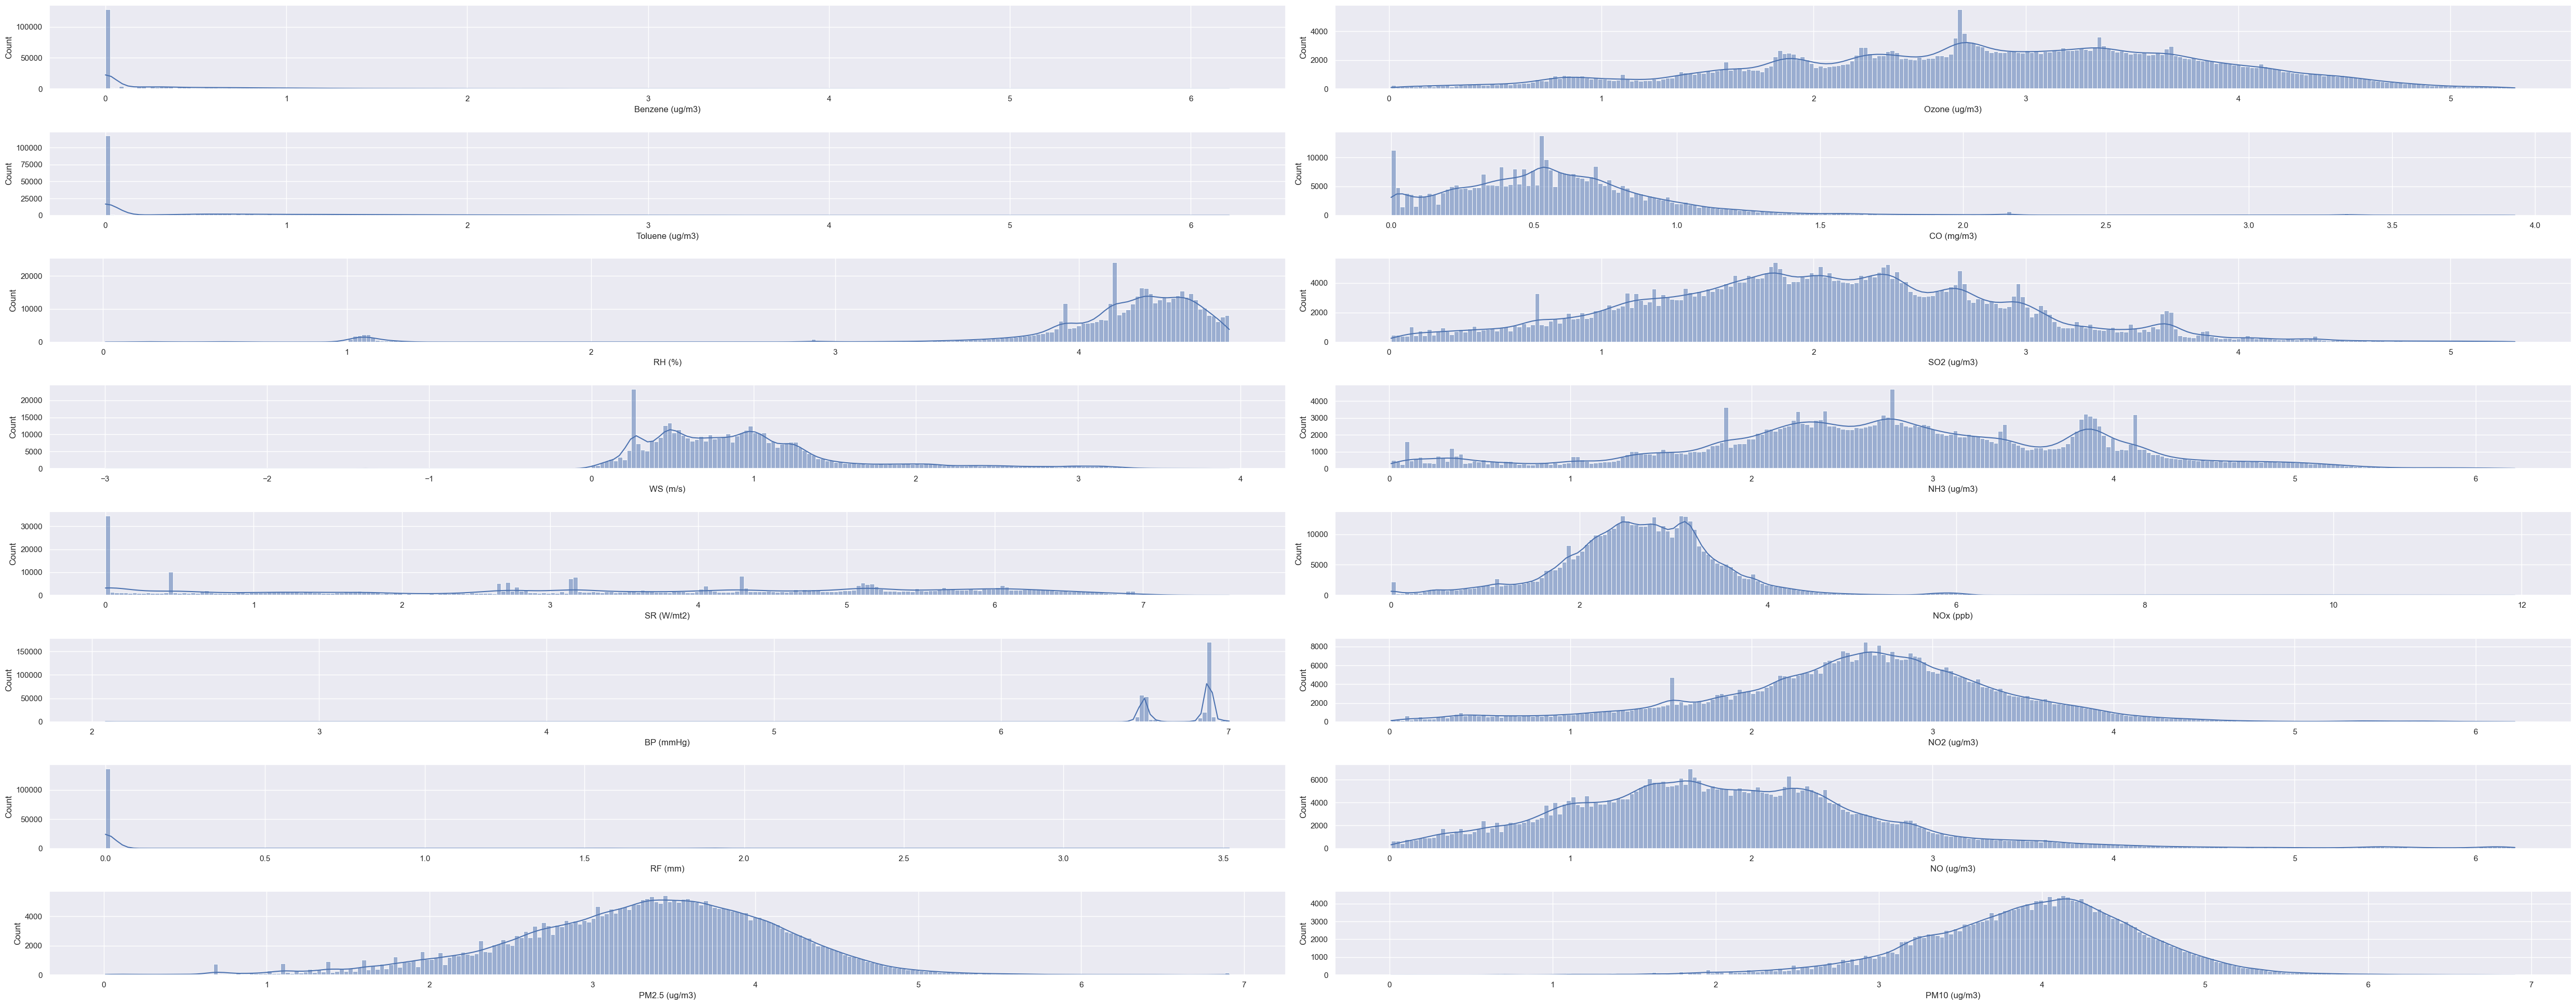

In [14]:
dv = data.copy()
column = ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)','RF (mm)','PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)']
len_column = len(column) if len(column)%2 == 0 else len(column)+1
dv[column] = np.log1p(dv[column])

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(column)//2):
    sns.histplot(data=dv[column[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=dv[column[len(column)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [15]:
ds = outlier_detection(dv,remove=True)
ds.set_index(ds['datetime'],drop=True,inplace=True)
ds.drop("datetime",inplace=True,axis=1)

In [16]:
interpolateble_values = []
for k, v in null_value_percentage(df[df.index.year > 2021]).items():
    if v <0.2:
        interpolateble_values.append(k)
interpolateble_values.remove('city')
interpolateble_values.remove('NOx (ppb)')
for i in range(len(interpolateble_values)):
    ds[interpolateble_values[i]].interpolate(method='linear',inplace=True)
ds['NOx (ppb)'].interpolate(method='pad',inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = ds.copy(deep=True)
columns = train_mice.columns
mice_imputer = IterativeImputer(random_state = 42, max_iter=10)
train_mice = mice_imputer.fit_transform(train_mice)
train_mice = pd.DataFrame(train_mice,columns=columns)

# for i in columns:
#     compare_dists(ds[i], {"MICE Interpolation":train_mice[i] })

C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_14176\3418952035.py:9: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds['NOx (ppb)'].interpolate(method='pad',inplace=True)
p:\virtual_projects\MLOPS\env\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


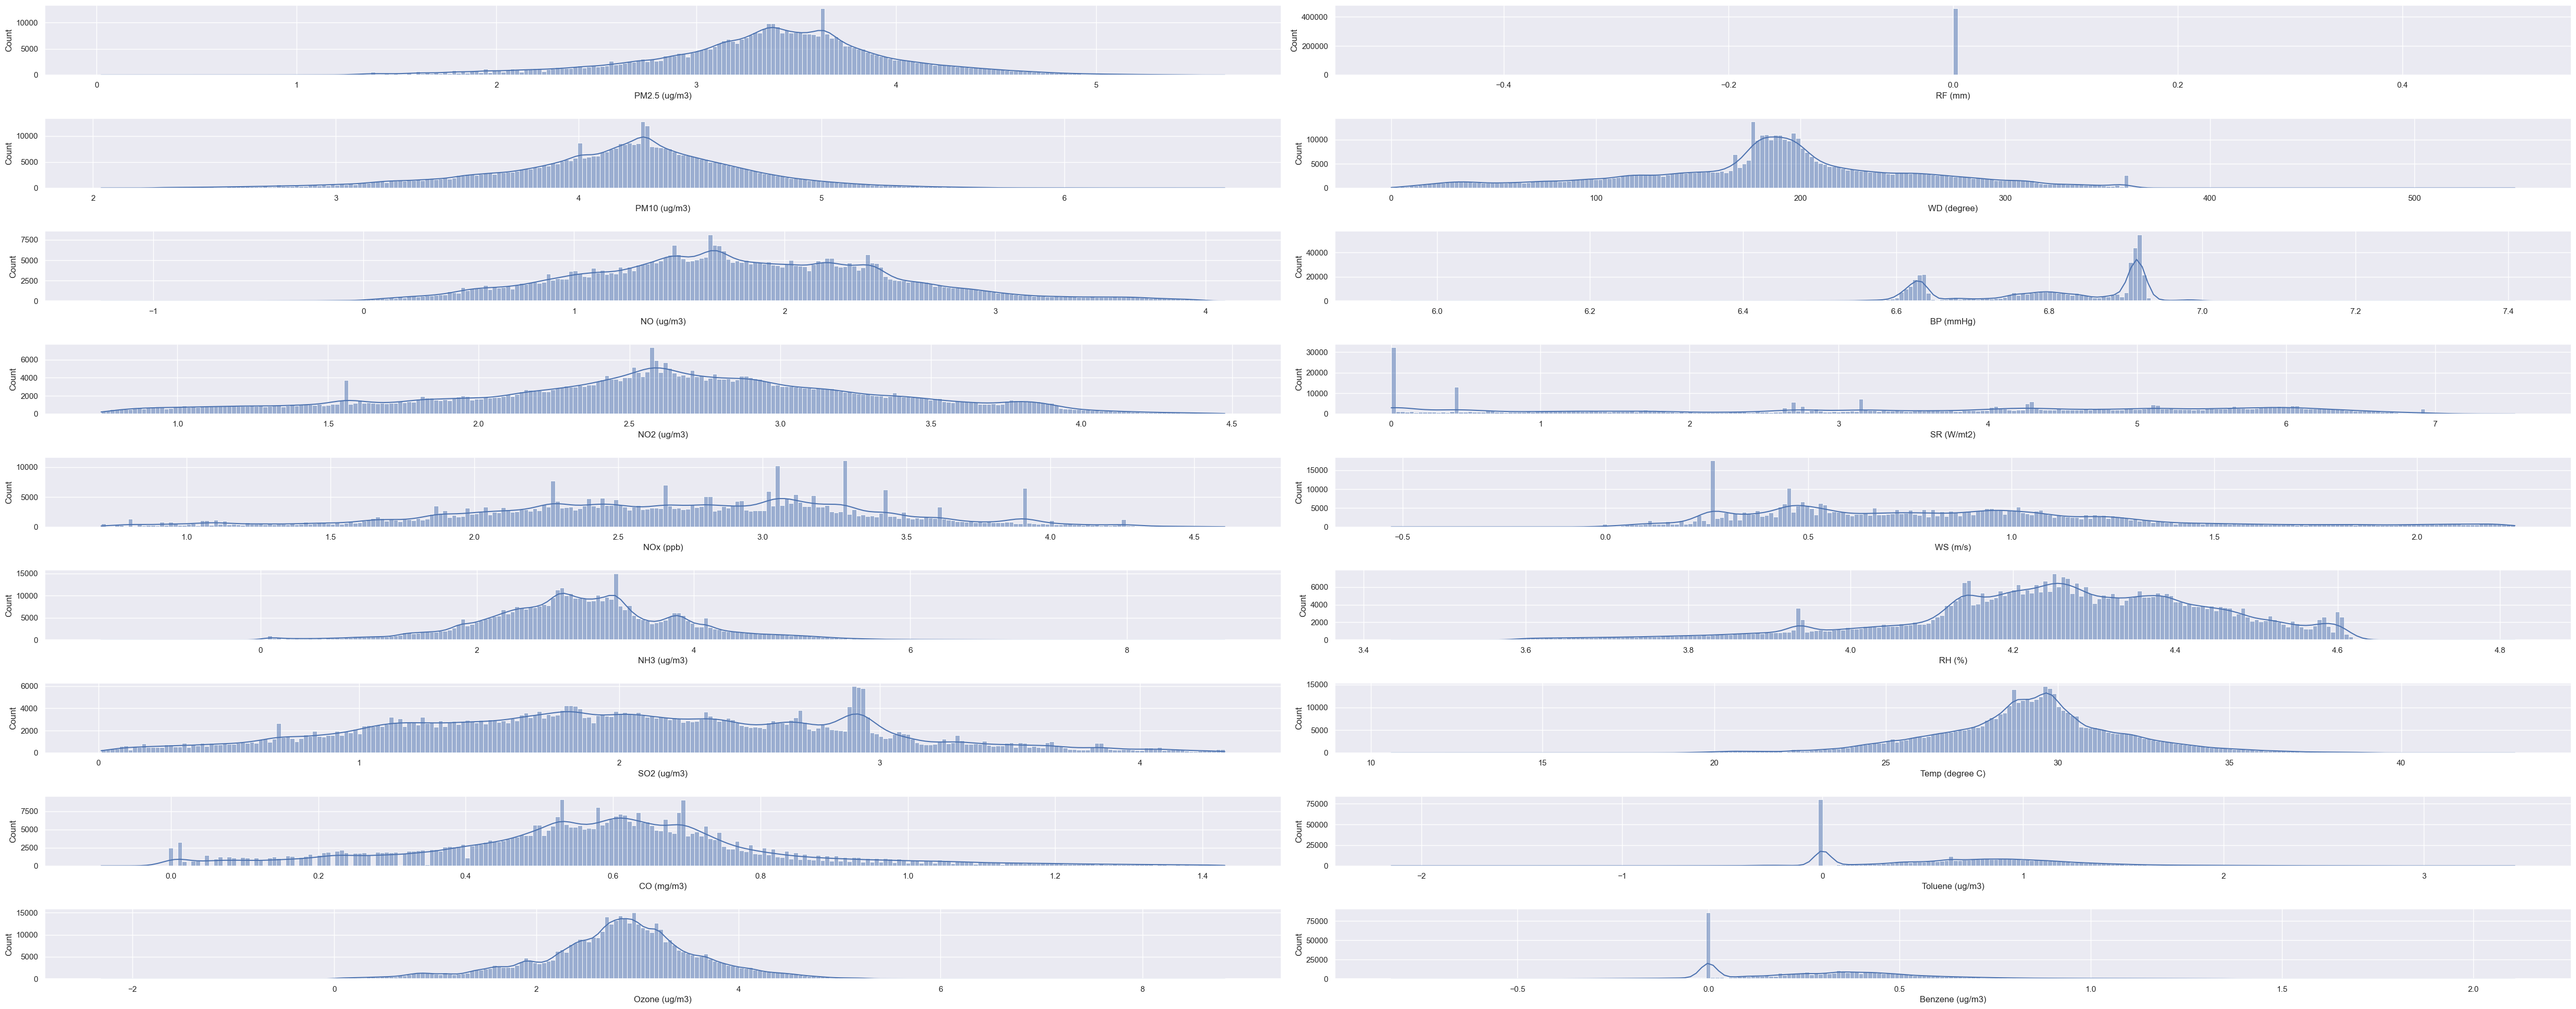

In [17]:
len_column = len(train_mice.columns) if len(train_mice.columns)%2 == 0 else len(train_mice.columns)+1

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(train_mice.columns)//2):
    sns.histplot(data=train_mice[train_mice.columns[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=train_mice[train_mice.columns[len(train_mice.columns)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [18]:
def create_features(df1):
    df1 = df1.copy()
    df1['hour']       = df1.index.hour
    df1['dayofmonth'] = df1.index.day
    df1['dayofweek']  = df1.index.dayofweek
    df1['dayofyear']  = df1.index.dayofyear
    df1['weekofyear'] = df1.index.isocalendar().week.astype("int64")
    df1['month']      = df1.index.month
    df1['quarter']    = df1.index.quarter
    df1['year']       = df1.index.year
    return df1

In [19]:
train_mice = train_mice.set_index(ds.index)
train_mice = create_features(train_mice)

<Axes: >

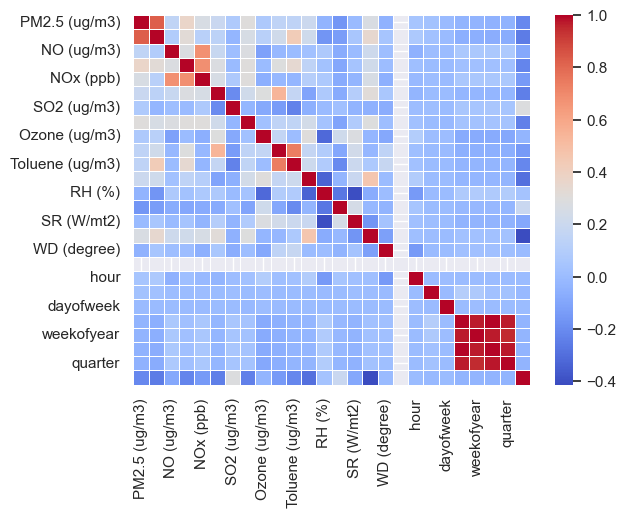

In [20]:
sns.heatmap(train_mice.corr(),
            cmap='coolwarm', fmt=".2f", linewidths=.5)

In [21]:
def create_lag_features(df):
    df = df.copy()
    df['pm_lag_1Y'] = df['PM2.5 (ug/m3)'].shift(365*24)   # 1 year lag
    df['pm_lag_2Y'] = df['PM2.5 (ug/m3)'].shift(730*24)   # 2 year lag
    return df

In [22]:
lag_features = ['pm_lag_1Y', 'pm_lag_2Y']
df = create_lag_features(train_mice)
df.head()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,hour,dayofmonth,dayofweek,dayofyear,weekofyear,month,quarter,year,pm_lag_1Y,pm_lag_2Y
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 07:00:00,3.772850,4.427035,3.138533,3.981736,4.326646,4.712091,2.038620,0.904218,1.381282,0.431966,...,7,1,4,1,53,1,1,2010,NaN,NaN
2010-01-01 08:00:00,3.799922,4.450918,2.784394,3.821004,4.108412,4.660566,2.350422,0.896088,2.107786,0.480183,...,8,1,4,1,53,1,1,2010,NaN,NaN
2010-01-01 09:00:00,3.731480,4.357771,2.285439,3.454106,3.700067,4.389301,2.616666,0.712950,3.032064,0.417238,...,9,1,4,1,53,1,1,2010,NaN,NaN
2010-01-01 10:00:00,3.314046,4.160182,1.829376,2.209373,2.663053,3.807263,1.887070,0.418710,3.448081,0.287317,...,10,1,4,1,53,1,1,2010,NaN,NaN
2010-01-01 11:00:00,3.129542,4.072980,1.682688,1.776646,2.331173,3.650561,1.286474,0.322083,3.572626,0.253237,...,11,1,4,1,53,1,1,2010,NaN,NaN


In [23]:
def replace_lag_na(df, how):
    '''
    Replaces missing values by applying various methods.
    
    Some additional ideas to implement include:
      1. Replace lag NaNs with the overall chosen method for that variable
      2. Replace lag NaNs with the time chosen method for the variable in the window value
    '''

    # Replace lag NaNs with zeros
    if how == 'zeros':
        return df.fillna(0)
    # Drop missing lag records
    if how == 'drop':
        return df.dropna(how='any')

In [24]:
target = 'PM2.5 (ug/m3)'
date_features = ['hour', 'dayofmonth', 'dayofweek',
                 'dayofyear', 'weekofyear', 'month', 'quarter', 'year']
predictors = date_features + lag_features

In [33]:
def create_train_test_sets(dataframe, split, replace_na=False, method='none'):
    '''
    Creates the training and testing sets for prediction.

    Parameters
    ----------
        dataframe (DataFrame): The DataFrame to exctract the train and test sets
        split (float): The percentage to split the dataset
        replace_na (bool): Option to replace/remove missing values from the sets
        method (string): The method of dealing with missing values. Options include `zeros` or `drop`

    Return
    ------
        X_train (DataFrame): The training set
        X_test (DataFrame): The testing set
        y_train (Series): The y values of the training set
        y_test (Series): The y values of the testing set
    '''
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    dataframe = dataframe.copy()

    if replace_na:
        dataframe = replace_lag_na(dataframe, how=method)
    scaler = StandardScaler()
    # train_set, test_set = np.split(dataframe, [int(len(df) * split)])
    X = dataframe.drop("PM2.5 (ug/m3)",axis=1)
    y = dataframe["PM2.5 (ug/m3)"].values
    X = scaler.fit_transform(X)
    print(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = create_train_test_sets(
    df, split=0.8, replace_na=True, method='drop')

[[-0.47377283  1.76494771 -1.29043247 ... -1.72025342  0.37073641
   0.65772197]
 [-0.44685372  1.20314136 -1.63546904 ... -1.72025342  0.44925814
   0.70120429]
 [-0.52892333  1.27026083 -1.98613468 ... -1.72025342  0.33136655
   0.59127556]
 ...
 [ 1.36731661 -3.13289663  2.315278   ...  1.15458649 -0.14303294
  -0.47943216]
 [ 1.36731661 -3.13289663  2.315278   ...  1.15458649 -0.14331918
  -0.48255237]
 [ 1.36731661 -3.13289663  2.315278   ...  1.15458649 -0.14360541
  -0.48567258]]


In [35]:
train_mice

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,WD (degree),RF (mm),hour,dayofmonth,dayofweek,dayofyear,weekofyear,month,quarter,year
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 07:00:00,3.772850,4.427035,3.138533,3.981736,4.326646,4.712091,2.038620,0.904218,1.381282,0.431966,...,261.590000,0.0,7,1,4,1,53,1,1,2010
2010-01-01 08:00:00,3.799922,4.450918,2.784394,3.821004,4.108412,4.660566,2.350422,0.896088,2.107786,0.480183,...,263.600000,0.0,8,1,4,1,53,1,1,2010
2010-01-01 09:00:00,3.731480,4.357771,2.285439,3.454106,3.700067,4.389301,2.616666,0.712950,3.032064,0.417238,...,139.800000,0.0,9,1,4,1,53,1,1,2010
2010-01-01 10:00:00,3.314046,4.160182,1.829376,2.209373,2.663053,3.807263,1.887070,0.418710,3.448081,0.287317,...,86.080000,0.0,10,1,4,1,53,1,1,2010
2010-01-01 11:00:00,3.129542,4.072980,1.682688,1.776646,2.331173,3.650561,1.286474,0.322083,3.572626,0.253237,...,82.370000,0.0,11,1,4,1,53,1,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07 15:00:00,3.814397,4.868060,-0.479743,4.249352,0.951658,2.867446,2.467252,0.558658,3.294176,0.962546,...,216.552177,0.0,15,7,1,38,6,2,1,2023
2023-02-07 16:00:00,3.814397,4.868060,-0.479743,4.249352,0.951658,2.867446,2.467252,0.558658,3.294176,0.962546,...,216.552177,0.0,16,7,1,38,6,2,1,2023
2023-02-07 17:00:00,3.814397,4.868060,-0.479743,4.249352,0.951658,2.867446,2.467252,0.558658,3.294176,0.962546,...,216.552177,0.0,17,7,1,38,6,2,1,2023


In [36]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
import xgboost


RANDOM_STATE = 42
ensemble_models = {
    'Random Forest':     RandomForestRegressor(random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingRegressor(random_state=RANDOM_STATE),
    'AdaBoost':          AdaBoostRegressor(random_state=RANDOM_STATE),
    'Histogram GB':      HistGradientBoostingRegressor(random_state=RANDOM_STATE),
    'XGBoost':           xgboost.XGBRegressor(random_state=RANDOM_STATE)
}

In [37]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


def get_estimator_scores(models):
    '''
    Uses various metric algorithms to calculate various scores for multiple estimators
    '''
    metrics = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions_test = model.predict(X_test)

        metrics.append([
            model_name,
            model.score(X_train, y_train),
            r2_score(y_test, predictions_test),
            np.sqrt(mean_squared_error(y_test, predictions_test)),
            mean_absolute_error(y_test, predictions_test),
            mean_absolute_percentage_error(y_test, predictions_test)
        ])

    return pd.DataFrame(metrics, columns=['model', 'r2_train', 'r2_test', 'rmse', 'mae', 'mape'])

In [38]:
estimator_scores = get_estimator_scores(ensemble_models)

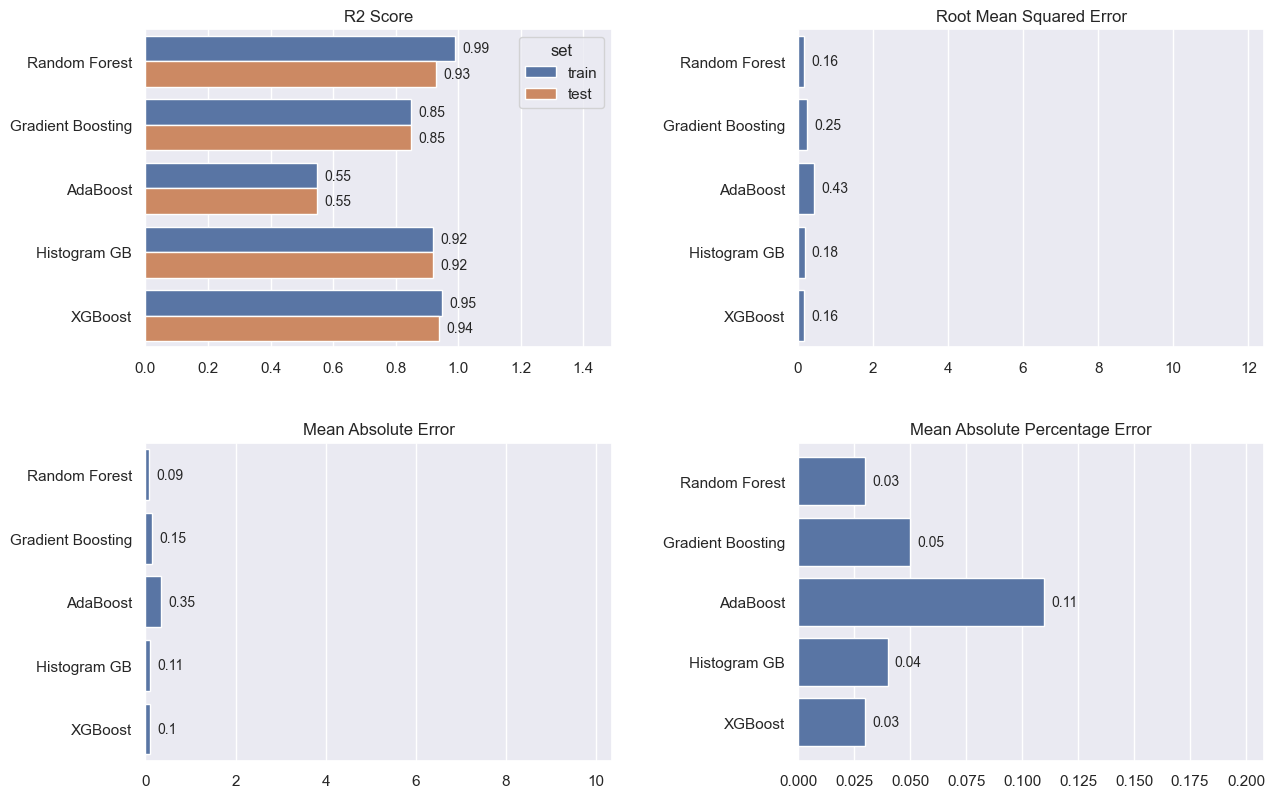

In [ ]:
def plot_estimator_scores(scores):
    melted_r2 = scores[['model', 'r2_train', 'r2_test']].rename(
        columns={"r2_train": "train", "r2_test": "test"})
    melted_r2 = melted_r2.melt(
        id_vars='model', var_name='set', value_name='score')

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.4)

    sns.barplot(data=melted_r2.round(2), x='score', y='model',
                hue='set', orient='h', ax=axes[0, 0])
    sns.barplot(data=scores.round(2), x='rmse',
                y='model', orient='h', ax=axes[0, 1])
    sns.barplot(data=scores.round(2), x='mae',
                y='model', orient='h', ax=axes[1, 0])
    sns.barplot(data=scores.round(2), x='mape',
                y='model', orient='h', ax=axes[1, 1])

    axes[0, 0].set_title('R2 Score')
    axes[0, 0].bar_label(axes[0, 0].containers[0], size=10, padding=5)
    axes[0, 0].bar_label(axes[0, 0].containers[1], size=10, padding=5)
    axes[0, 0].set(xlabel=None, ylabel=None)
    axes[0, 0].set_xlim(0, max(melted_r2['score'])+.5)

    axes[0, 1].set_title('Root Mean Squared Error')
    axes[0, 1].bar_label(axes[0, 1].containers[0], size=10, padding=5)
    axes[0, 1].set(xlabel=None, ylabel=None)
    axes[0, 1].set_xlim(0, max(scores['rmse'])+12)

    axes[1, 0].set_title('Mean Absolute Error')
    axes[1, 0].bar_label(axes[1, 0].containers[0], size=10, padding=5)
    axes[1, 0].set(xlabel=None, ylabel=None)
    axes[1, 0].set_xlim(0, max(scores['mae'])+10)

    axes[1, 1].set_title('Mean Absolute Percentage Error')
    axes[1, 1].bar_label(axes[1, 1].containers[0], size=10, padding=5)
    axes[1, 1].set(xlabel=None, ylabel=None)
    axes[1, 1].set_xlim(0, max(scores['mape'])+0.1)

    plt.plot()

plot_estimator_scores(estimator_scores)

In [40]:
estimator_scores.values()

TypeError: 'numpy.ndarray' object is not callable

In [42]:
from sklearn.model_selection import TimeSeriesSplit


tscv = TimeSeriesSplit(n_splits=5)

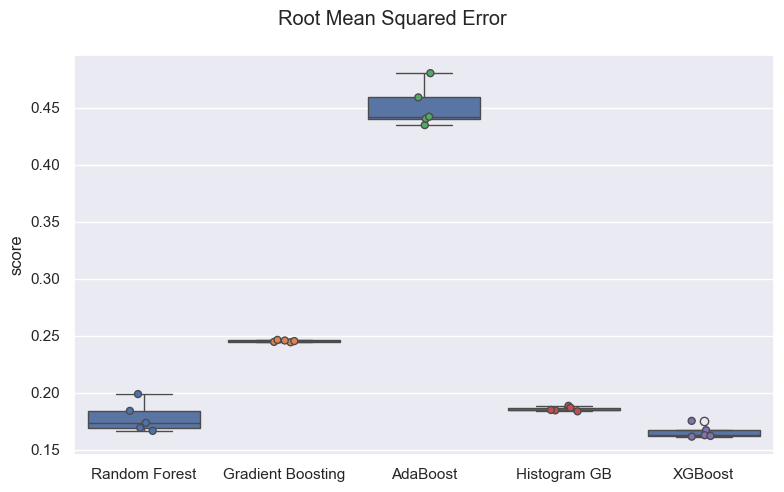

In [45]:
from sklearn.model_selection import (
    cross_val_score,
    TimeSeriesSplit,
    RandomizedSearchCV
)
def get_cross_val_scores(models, x, y, cv, scoring):
    '''
    Get cross validated scores for input models.

    Parameters
    ----------
        models (dict): Dictionary containing the name of the model and the estimator object.
        x (DataFrame): A DataFrame containing the feature values to train upon.
        y (DataFrame): A Series object containing the actual predicted values.
        cv (CrossValidator or int): The cross-validation technique. An int value will perform k-fold CV.
        scoring (string): The scoring metric to evaluate the models.

    Return
    ------
        results (DataFrame): A DataFrame which contains the results for the CV run.
    '''

    measurements = [(model_name, i, score)
                    for model_name, model in ensemble_models.items()
                    for i, score in enumerate(-cross_val_score(model, x, y, cv=cv, scoring=scoring, n_jobs=-1))]

    results = pd.DataFrame(measurements, columns=['model', 'fold', 'score'])
    return results


cv_results = get_cross_val_scores(
    ensemble_models, X_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(8, 5))
plt.suptitle('Root Mean Squared Error')

cs_metrics_bxplt = sns.boxplot(x='model', y='score', data=cv_results)
cs_metrics_stplt = sns.stripplot(x='model', y='score', hue='model', data=cv_results,
                                 size=5, jitter=True, linewidth=1, legend=False)

cs_metrics_bxplt.tick_params(labelsize=11)
cs_metrics_bxplt.set(xlabel=None)
plt.tight_layout()
plt.show()

In [46]:
cv_results.groupby('model').score.mean().sort_values()

model
XGBoost              0.165623
Random Forest        0.178300
Histogram GB         0.185551
Gradient Boosting    0.245137
AdaBoost             0.451218
Name: score, dtype: float64

In [47]:
cv_results.groupby('model').score.mean().sort_values()

model
XGBoost              0.165623
Random Forest        0.178300
Histogram GB         0.185551
Gradient Boosting    0.245137
AdaBoost             0.451218
Name: score, dtype: float64

In [48]:
# Hyperparameter configurations for RandomizedSearch
N_JOBS = -1
model_hyperparameters = {
    'Random Forest': {'n_estimators': [100, 150, 200],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [2, 4, 10],
                      'max_depth': [5, 10],
                      'n_jobs': [N_JOBS],
                      'random_state': [RANDOM_STATE]},

    'Gradient Boosting': {'learning_rate': np.arange(0.01, 1, 0.01),
                          'n_estimators': [100, 200, 300],
                          'min_samples_split': [2, 5],
                          'min_samples_leaf': [1, 4, 10],
                          'max_depth': [3, 5],
                          'n_iter_no_change': [10],
                          'tol': [0.01],
                          'random_state': [RANDOM_STATE]},

    'AdaBoost': {'learning_rate': np.arange(0.01, 1, 0.01),
                 'n_estimators': [50, 100, 200, 300],
                 'random_state': [RANDOM_STATE]},

    'Histogram GB': {'learning_rate': np.arange(0.01, 1, 0.01),
                     'max_iter': [100, 150, 200],
                     'min_samples_leaf': [10, 20, 30],
                     'max_depth': [None, 3, 5, 10],
                     'n_iter_no_change': [10],
                     'tol': [0.01],
                     'random_state': [RANDOM_STATE]},

    'XGBoost': {'learning_rate': np.arange(0.01, 1, 0.01),
                'n_estimators': [20, 50, 100, 250],
                'max_depth': [None, 3, 5],
                'eval_metric': ['rmse'],
                'early_stopping_rounds': [10],
                'n_jobs': [N_JOBS],
                'random_state': [RANDOM_STATE]}
}

In [49]:
import time


def random_search_cv(models, params, n_iter, cv, scoring):
    '''
    Performs hyperparameter tuning using RandomizedSearch.

    Parameters
    ----------
        models (dict): Dictionary containing the name of the model and its respective estimator object.
        params (dict): Dictionary containing the name of the model and its respective hyperparameter spaces to search.
        n_iter (int): The number of candidates to choose from the search space.
        cv (CrossValidator or int): The cross-validation technique. An int value will perform k-fold CV.
        scoring (string): The scoring metric to evaluate the models.

    Return
    ------
        models (dict): A dictionary containing the name of the model and the tuned model parameters.
        model_scores (DataFrame): DataFrame indicating the model's name and the attained best score.
    '''

    print(
        f'Fitting {tscv.n_splits} folds for each of {n_iter} candidates, totalling {tscv.n_splits*n_iter} fits.\n')

    model_scores = []

    for model_name, model in ensemble_models.items():
        start = time.time()

        # Use RandomizedSearch as the search space is quite big. For more accurate results we can use GridSearch.
        rscv_model = RandomizedSearchCV(model, params[model_name],
                                        cv=cv,
                                        scoring=scoring,
                                        return_train_score=True,
                                        n_jobs=N_JOBS,
                                        n_iter=n_iter,
                                        random_state=RANDOM_STATE)

        if model_name == 'XGBoost':
            rscv_model.fit(X_train, y_train, eval_set=[
                           (X_train, y_train), (X_test, y_test)], verbose=0)
        else:
            rscv_model.fit(X_train, y_train)
        end = time.time()

        print(
            f'Randomized Search CV for {model_name} finished after {round(end-start, 2)} seconds. Best parameters found:')
        print(f'{rscv_model.best_params_}\n')

        models[model_name] = rscv_model.best_estimator_
        model_scores.append((model_name, round(-rscv_model.best_score_, 4)))

    model_scores = pd.DataFrame(model_scores, columns=['model', 'score'])

    return models, model_scores

In [50]:
ensemble_models, rscv_scores = random_search_cv(
    ensemble_models, model_hyperparameters, n_iter=20, cv=tscv, scoring="neg_root_mean_squared_error")

Fitting 5 folds for each of 20 candidates, totalling 100 fits.

Randomized Search CV for Random Forest finished after 4748.63 seconds. Best parameters found:
{'random_state': 42, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}

Randomized Search CV for Gradient Boosting finished after 841.41 seconds. Best parameters found:
{'tol': 0.01, 'random_state': 42, 'n_iter_no_change': 10, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.46}

Randomized Search CV for AdaBoost finished after 2114.55 seconds. Best parameters found:
{'random_state': 42, 'n_estimators': 100, 'learning_rate': 0.03}

Randomized Search CV for Histogram GB finished after 27.84 seconds. Best parameters found:
{'tol': 0.01, 'random_state': 42, 'n_iter_no_change': 10, 'min_samples_leaf': 10, 'max_iter': 200, 'max_depth': None, 'learning_rate': 0.42000000000000004}

Randomized Search CV for XGBoost finished after 306.62 

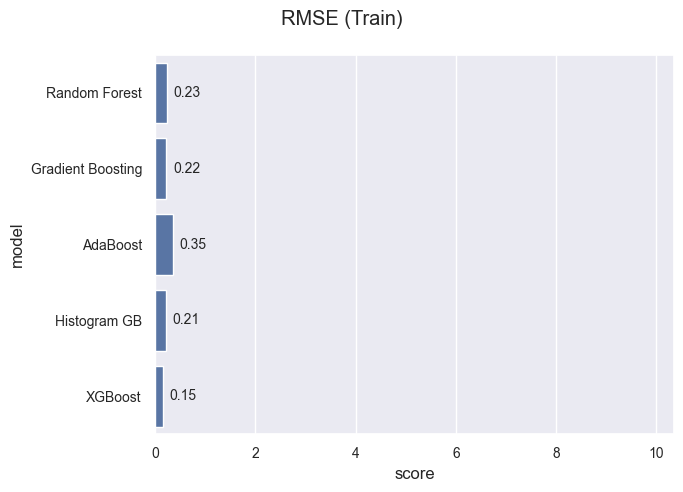

In [51]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle("RMSE (Train)")

metrics_plt = sns.barplot(rscv_scores.round(
    2), x='score', y='model', orient='h')
metrics_plt.tick_params(labelsize=10)
metrics_plt.bar_label(metrics_plt.containers[0], size=10, padding=5)

plt.xlim(0, max(rscv_scores.score)+10)
plt.tight_layout()
plt.show()

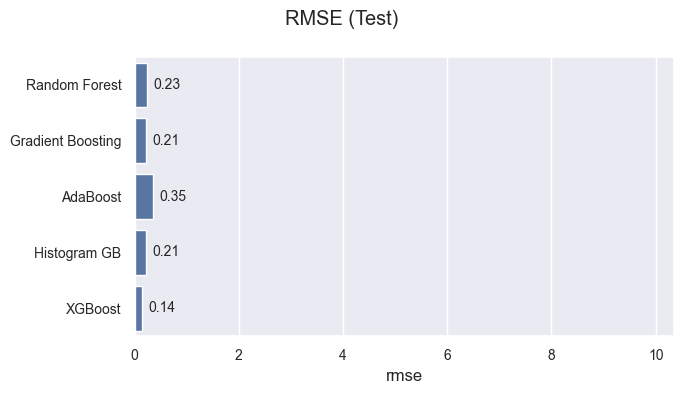

In [52]:
time_metrics = []
for model_name, model in ensemble_models.items():

    fit_start = time.time()
    if model_name == 'XGBoost':
        model.fit(X_train, y_train, eval_set=[
                  (X_train, y_train), (X_test, y_test)], verbose=0)
    else:
        model.fit(X_train, y_train)
    fit_end = time.time()

    pred_start = time.time()
    predictions_test = model.predict(X_test)
    pred_end = time.time()

    time_metrics.append([
        model_name,
        np.sqrt(mean_squared_error(y_test, predictions_test)),
        fit_end-fit_start,
        pred_end-pred_start
    ])

time_metrics = pd.DataFrame(time_metrics, columns=[
                            'model', 'rmse', 'fit_time', 'predict_time'])
fig = plt.figure(figsize=(7, 4))
fig.suptitle("RMSE (Test)")
metrics_plt = sns.barplot(time_metrics.round(
    2), x='rmse', y='model', orient='h')
metrics_plt.tick_params(labelsize=10)
metrics_plt.bar_label(metrics_plt.containers[0], size=10, padding=5)
metrics_plt.set(ylabel=None)

plt.xlim(0, max(time_metrics.rmse)+10)
plt.tight_layout()
plt.show()

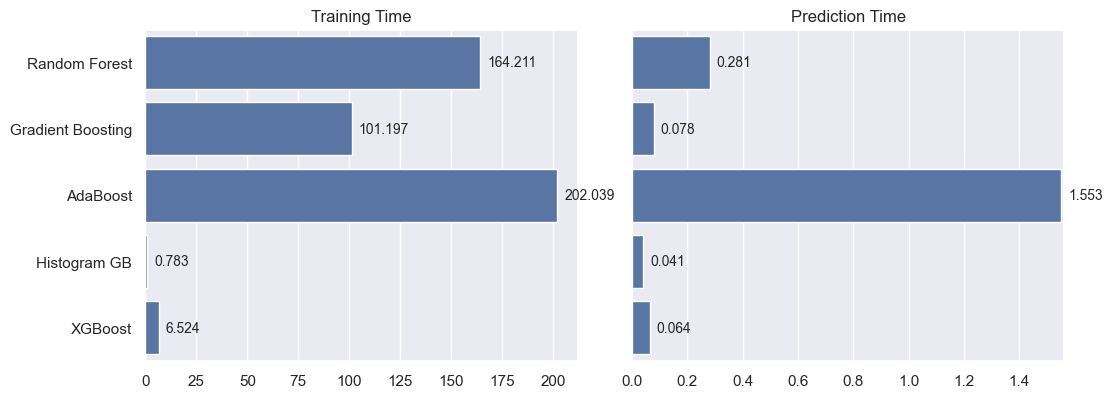

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.tight_layout(w_pad=2.0)

sns.barplot(time_metrics.round(3), x='fit_time',
            y='model', orient='h', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], size=10, padding=5)
axes[0].set_xlim(0, max(time_metrics.fit_time)+10)
axes[0].set(xlabel=None, ylabel=None)
axes[0].set_title('Training Time')

sns.barplot(time_metrics.round(3), x='predict_time',
            y='model', orient='h', ax=axes[1])
axes[1].bar_label(axes[1].containers[0], size=10, padding=5)
axes[1].set_xlim(0, max(time_metrics.predict_time)+0.01)
axes[1].set(xlabel=None, ylabel=None)
axes[1].set_title('Prediction Time')

plt.show()

In [1]:
feature_importances_df = pd.DataFrame(data=ensemble_models['Random Forest'].feature_importances_,
                                      index=ensemble_models['Random Forest'].feature_names_in_,
                                      columns=['importance'])
feature_importances_df.sort_values('importance').plot(kind='barh', figsize=(6, 4)).legend(loc='lower right')

NameError: name 'pd' is not defined

In [ ]:
def create_future_dataset(raw_data, start_date, end_date):
    '''
    Get cross validated scores for input models.

    Parameters
    ----------
        raw_data (DataFrame): The original dataset to gather insights from.
        start_date (string): The starting date to use for forecasting.
        end_date (string): The last date to use for forecasting.

    Return
    ------
        future_dataset (DataFrame): A DataFrame which contains the created dataset with future datetime indices.
    '''

    future_dataset = pd.DataFrame(pd.date_range(
        start=start_date, end=end_date, freq='1H'), columns=['datetime'])
    future_dataset = future_dataset.set_index('datetime')
    future_dataset = create_features(future_dataset)

    # Create lag features from raw data
    future_dataset['pm_lag_1Y'] = raw_data.loc[future_dataset.index -
                                               pd.Timedelta('365 days')][target].values
    future_dataset['pm_lag_2Y'] = raw_data.loc[future_dataset.index -
                                               pd.Timedelta('730 days')][target].values

    return future_dataset


future_df = create_future_dataset(
    df, start_date='2023-04-01', end_date='2024-03-30')

# Make sure the order of the features is the same as the one we fed to the models.
f_names = ensemble_models['XGBoost'].get_booster().feature_names
future_df = future_df[f_names]
test_predictions = X_test.copy()
future_predictions = future_df.copy()

for model_name, model in ensemble_models.items():
    test_predictions[f'predict_{model_name}'] = model.predict(X_test)
    future_predictions[f'predict_{model_name}'] = model.predict(future_df)
fig, axes = plt.subplots(5, 1, figsize=(12, 14), sharex=True)
fig.tight_layout(pad=2.0)

for index, (model_name, model) in enumerate(ensemble_models.items()):
    sns.lineplot(data=y_test, label="Actual Data", ax=axes[index])
    sns.lineplot(
        data=test_predictions[f'predict_{model_name}'], label="Testing Prediction", ax=axes[index])
    sns.lineplot(
        data=future_predictions[f'predict_{model_name}'], label="Future Prediction", ax=axes[index])
    axes[index].set_title(f'{model_name} - Predictions')
    axes[index].set(xlabel=None)

plt.show()

KeyError: "[Timestamp('2023-03-13 15:00:00'), Timestamp('2023-03-13 16:00:00'), Timestamp('2023-03-13 17:00:00'), Timestamp('2023-03-13 18:00:00'), Timestamp('2023-03-13 19:00:00'), Timestamp('2023-03-13 20:00:00'), Timestamp('2023-03-13 21:00:00'), Timestamp('2023-03-13 22:00:00'), Timestamp('2023-03-13 23:00:00'), Timestamp('2023-03-14 00:00:00'), Timestamp('2023-03-14 01:00:00'), Timestamp('2023-03-14 02:00:00'), Timestamp('2023-03-14 03:00:00'), Timestamp('2023-03-14 04:00:00'), Timestamp('2023-03-14 05:00:00'), Timestamp('2023-03-14 06:00:00'), Timestamp('2023-03-14 07:00:00'), Timestamp('2023-03-14 08:00:00'), Timestamp('2023-03-14 09:00:00'), Timestamp('2023-03-14 10:00:00'), Timestamp('2023-03-14 11:00:00'), Timestamp('2023-03-14 12:00:00'), Timestamp('2023-03-14 13:00:00'), Timestamp('2023-03-14 14:00:00'), Timestamp('2023-03-14 15:00:00'), Timestamp('2023-03-14 16:00:00'), Timestamp('2023-03-14 17:00:00'), Timestamp('2023-03-14 18:00:00'), Timestamp('2023-03-14 19:00:00'), Timestamp('2023-03-14 20:00:00'), Timestamp('2023-03-14 21:00:00'), Timestamp('2023-03-14 22:00:00'), Timestamp('2023-03-14 23:00:00'), Timestamp('2023-03-15 00:00:00'), Timestamp('2023-03-15 01:00:00'), Timestamp('2023-03-15 02:00:00'), Timestamp('2023-03-15 03:00:00'), Timestamp('2023-03-15 04:00:00'), Timestamp('2023-03-15 05:00:00'), Timestamp('2023-03-15 06:00:00'), Timestamp('2023-03-15 07:00:00'), Timestamp('2023-03-15 08:00:00'), Timestamp('2023-03-15 09:00:00'), Timestamp('2023-03-15 10:00:00'), Timestamp('2023-03-15 11:00:00'), Timestamp('2023-03-15 12:00:00'), Timestamp('2023-03-15 13:00:00'), Timestamp('2023-03-15 14:00:00'), Timestamp('2023-03-15 15:00:00'), Timestamp('2023-03-15 16:00:00'), Timestamp('2023-03-15 17:00:00'), Timestamp('2023-03-15 18:00:00'), Timestamp('2023-03-15 19:00:00'), Timestamp('2023-03-15 20:00:00'), Timestamp('2023-03-15 21:00:00'), Timestamp('2023-03-15 22:00:00'), Timestamp('2023-03-15 23:00:00'), Timestamp('2023-03-16 00:00:00'), Timestamp('2023-03-16 01:00:00'), Timestamp('2023-03-16 02:00:00'), Timestamp('2023-03-16 03:00:00'), Timestamp('2023-03-16 04:00:00'), Timestamp('2023-03-16 05:00:00'), Timestamp('2023-03-16 06:00:00'), Timestamp('2023-03-16 07:00:00'), Timestamp('2023-03-16 08:00:00'), Timestamp('2023-03-16 09:00:00'), Timestamp('2023-03-16 10:00:00'), Timestamp('2023-03-16 11:00:00'), Timestamp('2023-03-16 12:00:00'), Timestamp('2023-03-16 13:00:00'), Timestamp('2023-03-16 14:00:00'), Timestamp('2023-03-16 15:00:00'), Timestamp('2023-03-16 16:00:00'), Timestamp('2023-03-16 17:00:00'), Timestamp('2023-03-16 18:00:00'), Timestamp('2023-03-16 19:00:00'), Timestamp('2023-03-16 20:00:00'), Timestamp('2023-03-16 21:00:00'), Timestamp('2023-03-16 22:00:00'), Timestamp('2023-03-16 23:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-03-17 01:00:00'), Timestamp('2023-03-17 02:00:00'), Timestamp('2023-03-17 03:00:00'), Timestamp('2023-03-17 04:00:00'), Timestamp('2023-03-17 05:00:00'), Timestamp('2023-03-17 06:00:00'), Timestamp('2023-03-17 07:00:00'), Timestamp('2023-03-17 08:00:00'), Timestamp('2023-03-17 09:00:00'), Timestamp('2023-03-17 10:00:00'), Timestamp('2023-03-17 11:00:00'), Timestamp('2023-03-17 12:00:00'), Timestamp('2023-03-17 13:00:00'), Timestamp('2023-03-17 14:00:00'), Timestamp('2023-03-17 15:00:00'), Timestamp('2023-03-17 16:00:00'), Timestamp('2023-03-17 17:00:00'), Timestamp('2023-03-17 18:00:00'), Timestamp('2023-03-17 19:00:00'), Timestamp('2023-03-17 20:00:00'), Timestamp('2023-03-17 21:00:00'), Timestamp('2023-03-17 22:00:00'), Timestamp('2023-03-17 23:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-03-18 01:00:00'), Timestamp('2023-03-18 02:00:00'), Timestamp('2023-03-18 03:00:00'), Timestamp('2023-03-18 04:00:00'), Timestamp('2023-03-18 05:00:00'), Timestamp('2023-03-18 06:00:00'), Timestamp('2023-03-18 07:00:00'), Timestamp('2023-03-18 08:00:00'), Timestamp('2023-03-18 09:00:00'), Timestamp('2023-03-18 10:00:00'), Timestamp('2023-03-18 11:00:00'), Timestamp('2023-03-18 12:00:00'), Timestamp('2023-03-18 13:00:00'), Timestamp('2023-03-18 14:00:00'), Timestamp('2023-03-18 15:00:00'), Timestamp('2023-03-18 16:00:00'), Timestamp('2023-03-18 17:00:00'), Timestamp('2023-03-18 18:00:00'), Timestamp('2023-03-18 19:00:00'), Timestamp('2023-03-18 20:00:00'), Timestamp('2023-03-18 21:00:00'), Timestamp('2023-03-18 22:00:00'), Timestamp('2023-03-18 23:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-03-19 01:00:00'), Timestamp('2023-03-19 02:00:00'), Timestamp('2023-03-19 03:00:00'), Timestamp('2023-03-19 04:00:00'), Timestamp('2023-03-19 05:00:00'), Timestamp('2023-03-19 06:00:00'), Timestamp('2023-03-19 07:00:00'), Timestamp('2023-03-19 08:00:00'), Timestamp('2023-03-19 09:00:00'), Timestamp('2023-03-19 10:00:00'), Timestamp('2023-03-19 11:00:00'), Timestamp('2023-03-19 12:00:00'), Timestamp('2023-03-19 13:00:00'), Timestamp('2023-03-19 14:00:00'), Timestamp('2023-03-19 15:00:00'), Timestamp('2023-03-19 16:00:00'), Timestamp('2023-03-19 17:00:00'), Timestamp('2023-03-19 18:00:00'), Timestamp('2023-03-19 19:00:00'), Timestamp('2023-03-19 20:00:00'), Timestamp('2023-03-19 21:00:00'), Timestamp('2023-03-19 22:00:00'), Timestamp('2023-03-19 23:00:00'), Timestamp('2023-03-20 00:00:00'), Timestamp('2023-03-20 01:00:00'), Timestamp('2023-03-20 02:00:00'), Timestamp('2023-03-20 03:00:00'), Timestamp('2023-03-20 04:00:00'), Timestamp('2023-03-20 05:00:00'), Timestamp('2023-03-20 06:00:00'), Timestamp('2023-03-20 07:00:00'), Timestamp('2023-03-20 08:00:00'), Timestamp('2023-03-20 09:00:00'), Timestamp('2023-03-20 10:00:00'), Timestamp('2023-03-20 11:00:00'), Timestamp('2023-03-20 12:00:00'), Timestamp('2023-03-20 13:00:00'), Timestamp('2023-03-20 14:00:00'), Timestamp('2023-03-20 15:00:00'), Timestamp('2023-03-20 16:00:00'), Timestamp('2023-03-20 17:00:00'), Timestamp('2023-03-20 18:00:00'), Timestamp('2023-03-20 19:00:00'), Timestamp('2023-03-20 20:00:00'), Timestamp('2023-03-20 21:00:00'), Timestamp('2023-03-20 22:00:00'), Timestamp('2023-03-20 23:00:00'), Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-21 01:00:00'), Timestamp('2023-03-21 02:00:00'), Timestamp('2023-03-21 03:00:00'), Timestamp('2023-03-21 04:00:00'), Timestamp('2023-03-21 05:00:00'), Timestamp('2023-03-21 06:00:00'), Timestamp('2023-03-21 07:00:00'), Timestamp('2023-03-21 08:00:00'), Timestamp('2023-03-21 09:00:00'), Timestamp('2023-03-21 10:00:00'), Timestamp('2023-03-21 11:00:00'), Timestamp('2023-03-21 12:00:00'), Timestamp('2023-03-21 13:00:00'), Timestamp('2023-03-21 14:00:00'), Timestamp('2023-03-21 15:00:00'), Timestamp('2023-03-21 16:00:00'), Timestamp('2023-03-21 17:00:00'), Timestamp('2023-03-21 18:00:00'), Timestamp('2023-03-21 19:00:00'), Timestamp('2023-03-21 20:00:00'), Timestamp('2023-03-21 21:00:00'), Timestamp('2023-03-21 22:00:00'), Timestamp('2023-03-21 23:00:00'), Timestamp('2023-03-22 00:00:00'), Timestamp('2023-03-22 01:00:00'), Timestamp('2023-03-22 02:00:00'), Timestamp('2023-03-22 03:00:00'), Timestamp('2023-03-22 04:00:00'), Timestamp('2023-03-22 05:00:00'), Timestamp('2023-03-22 06:00:00'), Timestamp('2023-03-22 07:00:00'), Timestamp('2023-03-22 08:00:00'), Timestamp('2023-03-22 09:00:00'), Timestamp('2023-03-22 10:00:00'), Timestamp('2023-03-22 11:00:00'), Timestamp('2023-03-22 12:00:00'), Timestamp('2023-03-22 13:00:00'), Timestamp('2023-03-22 14:00:00'), Timestamp('2023-03-22 15:00:00'), Timestamp('2023-03-22 16:00:00'), Timestamp('2023-03-22 17:00:00'), Timestamp('2023-03-22 18:00:00'), Timestamp('2023-03-22 19:00:00'), Timestamp('2023-03-22 20:00:00'), Timestamp('2023-03-22 21:00:00'), Timestamp('2023-03-22 22:00:00'), Timestamp('2023-03-22 23:00:00'), Timestamp('2023-03-23 00:00:00'), Timestamp('2023-03-23 01:00:00'), Timestamp('2023-03-23 02:00:00'), Timestamp('2023-03-23 03:00:00'), Timestamp('2023-03-23 04:00:00'), Timestamp('2023-03-23 05:00:00'), Timestamp('2023-03-23 06:00:00'), Timestamp('2023-03-23 07:00:00'), Timestamp('2023-03-23 08:00:00'), Timestamp('2023-03-23 09:00:00'), Timestamp('2023-03-23 10:00:00'), Timestamp('2023-03-23 11:00:00'), Timestamp('2023-03-23 12:00:00'), Timestamp('2023-03-23 13:00:00'), Timestamp('2023-03-23 14:00:00'), Timestamp('2023-03-23 15:00:00'), Timestamp('2023-03-23 16:00:00'), Timestamp('2023-03-23 17:00:00'), Timestamp('2023-03-23 18:00:00'), Timestamp('2023-03-23 19:00:00'), Timestamp('2023-03-23 20:00:00'), Timestamp('2023-03-23 21:00:00'), Timestamp('2023-03-23 22:00:00'), Timestamp('2023-03-23 23:00:00'), Timestamp('2023-03-24 00:00:00'), Timestamp('2023-03-24 01:00:00'), Timestamp('2023-03-24 02:00:00'), Timestamp('2023-03-24 03:00:00'), Timestamp('2023-03-24 04:00:00'), Timestamp('2023-03-24 05:00:00'), Timestamp('2023-03-24 06:00:00'), Timestamp('2023-03-24 07:00:00'), Timestamp('2023-03-24 08:00:00'), Timestamp('2023-03-24 09:00:00'), Timestamp('2023-03-24 10:00:00'), Timestamp('2023-03-24 11:00:00'), Timestamp('2023-03-24 12:00:00'), Timestamp('2023-03-24 13:00:00'), Timestamp('2023-03-24 14:00:00'), Timestamp('2023-03-24 15:00:00'), Timestamp('2023-03-24 16:00:00'), Timestamp('2023-03-24 17:00:00'), Timestamp('2023-03-24 18:00:00'), Timestamp('2023-03-24 19:00:00'), Timestamp('2023-03-24 20:00:00'), Timestamp('2023-03-24 21:00:00'), Timestamp('2023-03-24 22:00:00'), Timestamp('2023-03-24 23:00:00'), Timestamp('2023-03-25 00:00:00'), Timestamp('2023-03-25 01:00:00'), Timestamp('2023-03-25 02:00:00'), Timestamp('2023-03-25 03:00:00'), Timestamp('2023-03-25 04:00:00'), Timestamp('2023-03-25 05:00:00'), Timestamp('2023-03-25 06:00:00'), Timestamp('2023-03-25 07:00:00'), Timestamp('2023-03-25 08:00:00'), Timestamp('2023-03-25 09:00:00'), Timestamp('2023-03-25 10:00:00'), Timestamp('2023-03-25 11:00:00'), Timestamp('2023-03-25 12:00:00'), Timestamp('2023-03-25 13:00:00'), Timestamp('2023-03-25 14:00:00'), Timestamp('2023-03-25 15:00:00'), Timestamp('2023-03-25 16:00:00'), Timestamp('2023-03-25 17:00:00'), Timestamp('2023-03-25 18:00:00'), Timestamp('2023-03-25 19:00:00'), Timestamp('2023-03-25 20:00:00'), Timestamp('2023-03-25 21:00:00'), Timestamp('2023-03-25 22:00:00'), Timestamp('2023-03-25 23:00:00'), Timestamp('2023-03-26 00:00:00'), Timestamp('2023-03-26 01:00:00'), Timestamp('2023-03-26 02:00:00'), Timestamp('2023-03-26 03:00:00'), Timestamp('2023-03-26 04:00:00'), Timestamp('2023-03-26 05:00:00'), Timestamp('2023-03-26 06:00:00'), Timestamp('2023-03-26 07:00:00'), Timestamp('2023-03-26 08:00:00'), Timestamp('2023-03-26 09:00:00'), Timestamp('2023-03-26 10:00:00'), Timestamp('2023-03-26 11:00:00'), Timestamp('2023-03-26 12:00:00'), Timestamp('2023-03-26 13:00:00'), Timestamp('2023-03-26 14:00:00'), Timestamp('2023-03-26 15:00:00'), Timestamp('2023-03-26 16:00:00'), Timestamp('2023-03-26 17:00:00'), Timestamp('2023-03-26 18:00:00'), Timestamp('2023-03-26 19:00:00'), Timestamp('2023-03-26 20:00:00'), Timestamp('2023-03-26 21:00:00'), Timestamp('2023-03-26 22:00:00'), Timestamp('2023-03-26 23:00:00'), Timestamp('2023-03-27 00:00:00'), Timestamp('2023-03-27 01:00:00'), Timestamp('2023-03-27 02:00:00'), Timestamp('2023-03-27 03:00:00'), Timestamp('2023-03-27 04:00:00'), Timestamp('2023-03-27 05:00:00'), Timestamp('2023-03-27 06:00:00'), Timestamp('2023-03-27 07:00:00'), Timestamp('2023-03-27 08:00:00'), Timestamp('2023-03-27 09:00:00'), Timestamp('2023-03-27 10:00:00'), Timestamp('2023-03-27 11:00:00'), Timestamp('2023-03-27 12:00:00'), Timestamp('2023-03-27 13:00:00'), Timestamp('2023-03-27 14:00:00'), Timestamp('2023-03-27 15:00:00'), Timestamp('2023-03-27 16:00:00'), Timestamp('2023-03-27 17:00:00'), Timestamp('2023-03-27 18:00:00'), Timestamp('2023-03-27 19:00:00'), Timestamp('2023-03-27 20:00:00'), Timestamp('2023-03-27 21:00:00'), Timestamp('2023-03-27 22:00:00'), Timestamp('2023-03-27 23:00:00'), Timestamp('2023-03-28 00:00:00'), Timestamp('2023-03-28 01:00:00'), Timestamp('2023-03-28 02:00:00'), Timestamp('2023-03-28 03:00:00'), Timestamp('2023-03-28 04:00:00'), Timestamp('2023-03-28 05:00:00'), Timestamp('2023-03-28 06:00:00'), Timestamp('2023-03-28 07:00:00'), Timestamp('2023-03-28 08:00:00'), Timestamp('2023-03-28 09:00:00'), Timestamp('2023-03-28 10:00:00'), Timestamp('2023-03-28 11:00:00'), Timestamp('2023-03-28 12:00:00'), Timestamp('2023-03-28 13:00:00'), Timestamp('2023-03-28 14:00:00'), Timestamp('2023-03-28 15:00:00'), Timestamp('2023-03-28 16:00:00'), Timestamp('2023-03-28 17:00:00'), Timestamp('2023-03-28 18:00:00'), Timestamp('2023-03-28 19:00:00'), Timestamp('2023-03-28 20:00:00'), Timestamp('2023-03-28 21:00:00'), Timestamp('2023-03-28 22:00:00'), Timestamp('2023-03-28 23:00:00'), Timestamp('2023-03-29 00:00:00'), Timestamp('2023-03-29 01:00:00'), Timestamp('2023-03-29 02:00:00'), Timestamp('2023-03-29 03:00:00'), Timestamp('2023-03-29 04:00:00'), Timestamp('2023-03-29 05:00:00'), Timestamp('2023-03-29 06:00:00'), Timestamp('2023-03-29 07:00:00'), Timestamp('2023-03-29 08:00:00'), Timestamp('2023-03-29 09:00:00'), Timestamp('2023-03-29 10:00:00'), Timestamp('2023-03-29 11:00:00'), Timestamp('2023-03-29 12:00:00'), Timestamp('2023-03-29 13:00:00'), Timestamp('2023-03-29 14:00:00'), Timestamp('2023-03-29 15:00:00'), Timestamp('2023-03-29 16:00:00'), Timestamp('2023-03-29 17:00:00'), Timestamp('2023-03-29 18:00:00'), Timestamp('2023-03-29 19:00:00'), Timestamp('2023-03-29 20:00:00'), Timestamp('2023-03-29 21:00:00'), Timestamp('2023-03-29 22:00:00'), Timestamp('2023-03-29 23:00:00'), Timestamp('2023-03-30 00:00:00'), Timestamp('2023-03-30 01:00:00'), Timestamp('2023-03-30 02:00:00'), Timestamp('2023-03-30 03:00:00'), Timestamp('2023-03-30 04:00:00'), Timestamp('2023-03-30 05:00:00'), Timestamp('2023-03-30 06:00:00'), Timestamp('2023-03-30 07:00:00'), Timestamp('2023-03-30 08:00:00'), Timestamp('2023-03-30 09:00:00'), Timestamp('2023-03-30 10:00:00'), Timestamp('2023-03-30 11:00:00'), Timestamp('2023-03-30 12:00:00'), Timestamp('2023-03-30 13:00:00'), Timestamp('2023-03-30 14:00:00'), Timestamp('2023-03-30 15:00:00'), Timestamp('2023-03-30 16:00:00'), Timestamp('2023-03-30 17:00:00'), Timestamp('2023-03-30 18:00:00'), Timestamp('2023-03-30 19:00:00'), Timestamp('2023-03-30 20:00:00'), Timestamp('2023-03-30 21:00:00'), Timestamp('2023-03-30 22:00:00'), Timestamp('2023-03-30 23:00:00'), Timestamp('2023-03-31 00:00:00')] not in index"